In [16]:
!pip install astsadata statsmodels --upgrade

Requirement already up-to-date: astsadata in /usr/local/lib/python3.7/dist-packages (0.0.4)
Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

In [18]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# 2.2 Exploratory Data Analysis

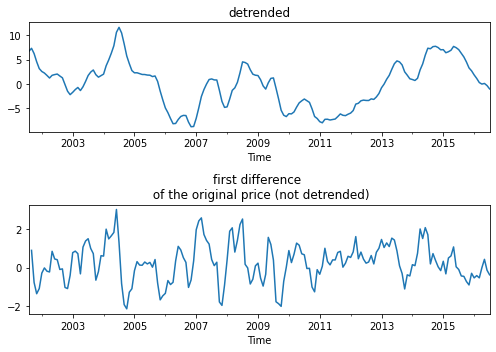

In [19]:
# Example 2.4 and 2.5
time = pd.Series([idx.ordinal for idx in chicken.index], index=chicken.index)
data_reg = pd.concat([time, chicken], axis=1)
data_reg.columns = ["time", "chicken"]

fit = ols(formula="chicken ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fit.resid.plot(ax=axes[0], xlabel="Time", title="detrended")
chicken.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original price (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()

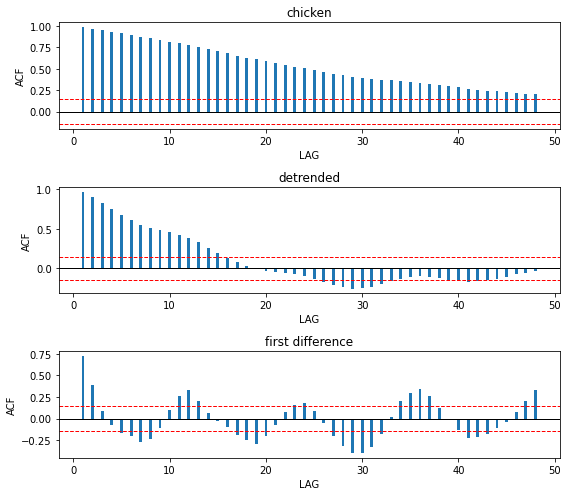

In [20]:
fig, axes = plt.subplots(nrows=3, figsize=(8, 7))

acf1(chicken, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("chicken")

acf1(fit.resid, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("detrended")

acf1(chicken.diff().dropna(), nlags=48, ax=axes[2], width=.3)
axes[2].set_title("first difference")

fig.tight_layout()
plt.show()

value    0.007926
dtype: float64


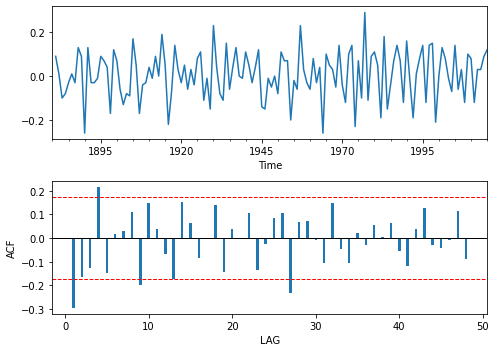

In [21]:
# Example 2.6
print(globtemp.diff().mean())

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
globtemp.diff().plot(ax=axes[0], xlabel="Time", legend=False)

acf1(gtemp.diff().dropna(), nlags=48, ax=axes[1], width=.3)

fig.tight_layout()
plt.show()

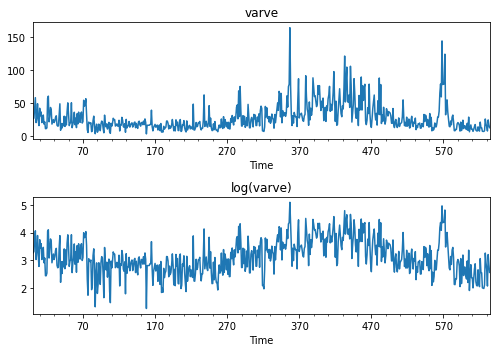

In [22]:
# Example 2.7
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
varve.plot(ax=axes[0], title="varve", xlabel="Time", legend=False)
varve.apply(np.log).plot(ax=axes[1], title="log(varve)", xlabel="Time", legend=False)
fig.tight_layout()
plt.show()

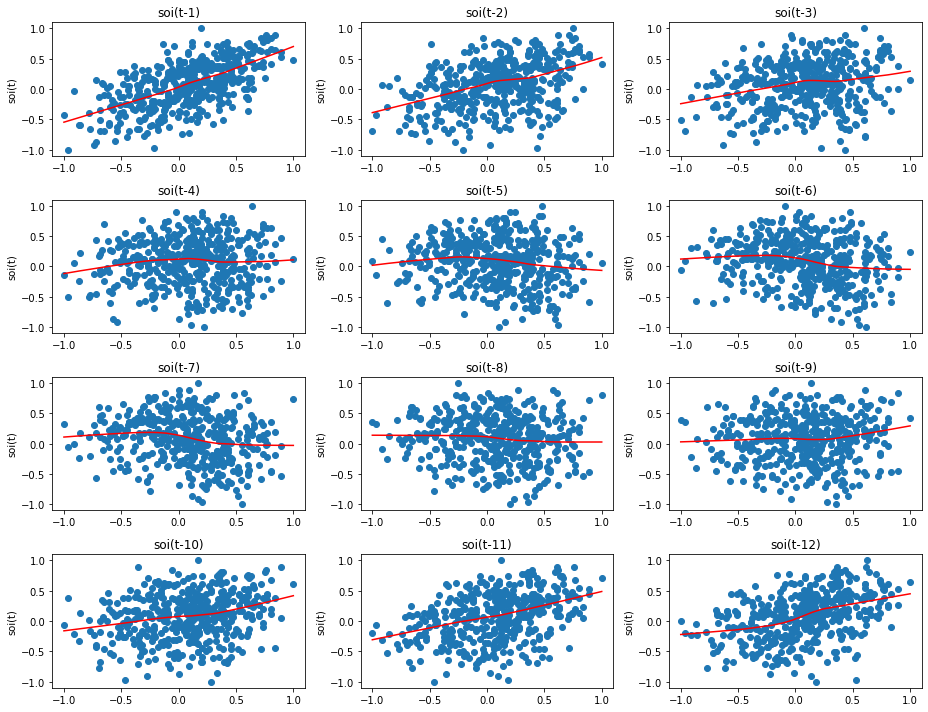

In [23]:
# Example 2.8
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))

lag = 1
for row in range(4):
    for col in range(3):
        lowess = sm.nonparametric.lowess(soi.iloc[:, 0], soi.iloc[:, 0].shift(lag))
        pd.plotting.lag_plot(soi, lag=lag, ax=axes[row, col])
        axes[row, col].set_title(f"soi(t-{lag})")
        axes[row, col].set_ylabel("soi(t)")
        axes[row, col].set_xlabel("")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.show()

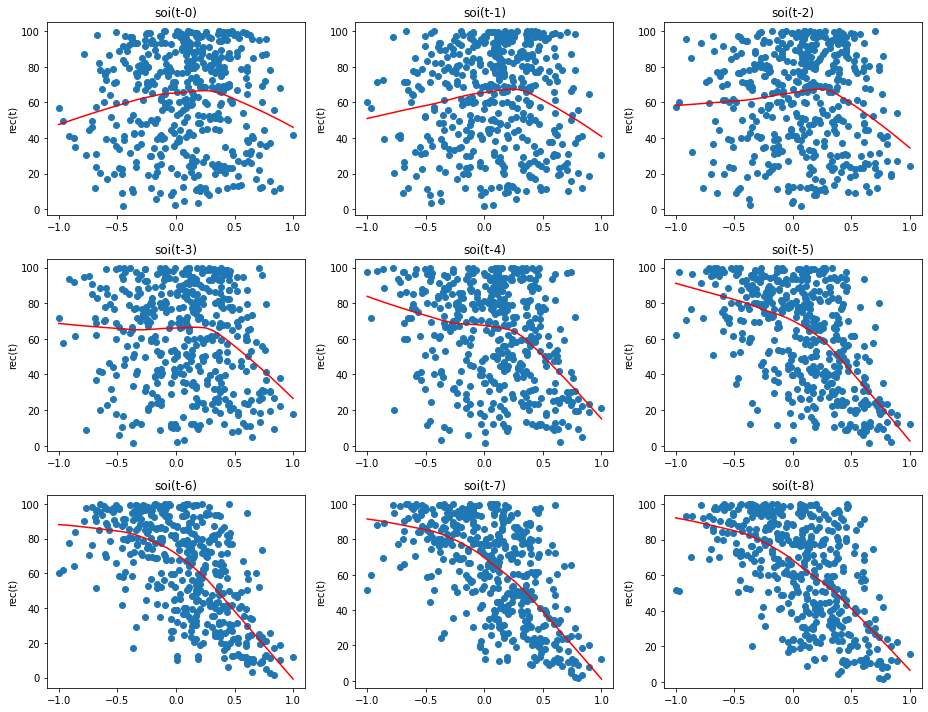

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(rec.iloc[:, 0], soi.iloc[:, 0].shift(lag))
        axes[row, col].scatter(soi.shift(lag), rec)
        axes[row, col].set_title(f"soi(t-{lag})")
        axes[row, col].set_ylabel("rec(t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.show()

In [25]:
dummy = pd.Series(np.where(soi.iloc[:, 0] < 0, 0, 1), index=soi.index)
fish = pd.concat([rec, soi.shift(6), dummy.shift(6)], axis=1).dropna()
fish.columns = ["rec", "soiL6", "dL6"]

fit = ols("rec ~ soiL6 * dL6", data=fish).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    rec   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     99.43
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.20e-49
Time:                        06:16:02   Log-Likelihood:                -2010.7
No. Observations:                 447   AIC:                             4029.
Df Residuals:                     443   BIC:                             4046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4794      2.865     25.998      0.0

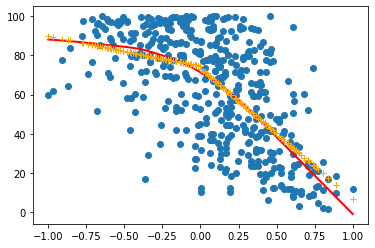

In [26]:
lowess = sm.nonparametric.lowess(fish["rec"], fish["soiL6"])

plt.scatter(fish["soiL6"], fish["rec"])
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2)
plt.plot(fish["soiL6"], fit.fittedvalues, "r+", color="orange")
plt.show()

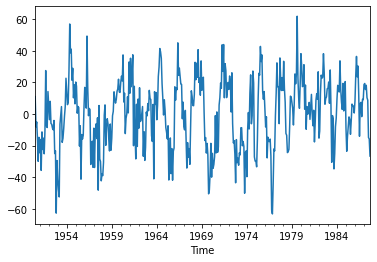

In [27]:
fit.resid.plot(xlabel="Time")
plt.show()

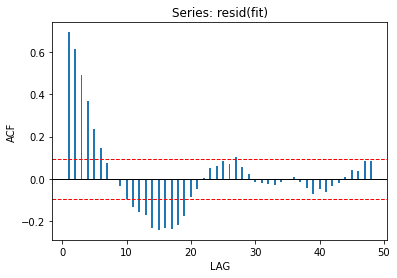

In [28]:
ax = acf1(fit.resid, nlags=48, width=.3)
ax.set_title("Series: resid(fit)")
plt.show()

In [29]:
# Example 2.10
np.random.seed(1000) # so you can reproduce the results
data_reg = pd.DataFrame({"x": 2 * np.cos(2 * np.pi * np.arange(1, 501)/50 + .6 * np.pi) + np.random.normal(size=500),
                         "z1": np.cos(2 * np.pi * np.arange(1, 501)/50),
                         "z2": np.sin(2 * np.pi * np.arange(1, 501)/50)})
fit = ols("x ~ 0 + z1 + z2", data=data_reg).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              523.5
Date:                Fri, 14 May 2021   Prob (F-statistic):                   3.69e-123
Time:                        06:16:03   Log-Likelihood:                         -709.97
No. Observations:                 500   AIC:                                      1424.
Df Residuals:                     498   BIC:                                      1432.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

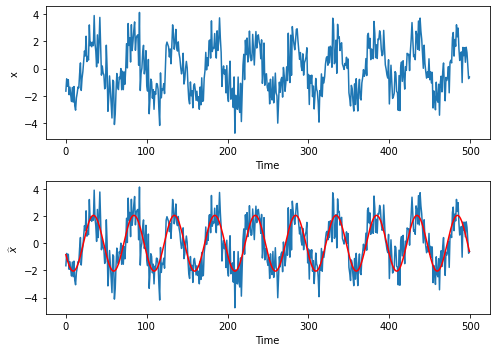

In [30]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
data_reg["x"].plot(ax=axes[0], xlabel="Time", ylabel="x")
data_reg["x"].plot(ax=axes[1], xlabel="Time", ylabel="x")
fit.fittedvalues.plot(ax=axes[1], color="red", xlabel="Time", ylabel=r"$\widehat{x}$")
fig.tight_layout()
plt.show()